In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [49]:
df = pd.read_csv("https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv")

df = df.drop(df.columns[0], axis=1)

df.to_csv('ibm_data.csv', index=False)

In [50]:
# Basic Data Inspection
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
0,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,Construction,In-Progress,07/07/2016,03/28/2018,NaN,4050000,4229193.0,3791127.0,"DSF: 0000821031, 0000822210",False
1,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,"CM, F&E",In-Progress,07/07/2016,03/28/2018,NaN,252000,489326.0,485620.0,"DSF: 0000821031, 0000822210",False
2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,07/27/2017,11/27/2017,08/03/2017,0,1792.0,1792.0,DSF: 0000823560,False
3,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Design,In-Progress,08/04/2017,02/05/2018,NaN,19110,17318.0,7169.0,DSF: 0000823560,True
4,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Construction,PNS,PNS,PNS,PNS,280280,280280.0,951.0,DSF: 0000823560,False


In [51]:
df.columns.tolist()

['project_geographic_district',
 'project_building_identifier',
 'project_school_name',
 'project_type',
 'project_description',
 'project_phase_name',
 'project_status_name',
 'project_phase_actual_start_date',
 'project_phase_planned_end_date',
 'project_phase_actual_end_date',
 'project_budget_amount',
 'final_estimate_of_actual_costs_through_end_of_phase_amount',
 'total_phase_actual_spending_amount',
 'dsf_number_s',
 'failure']

#### Handling Missing Values

In [52]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

project_geographic_district                                      0
project_building_identifier                                      0
project_school_name                                              0
project_type                                                     0
project_description                                              0
project_phase_name                                               1
project_status_name                                              0
project_phase_actual_start_date                                  0
project_phase_planned_end_date                                   0
project_phase_actual_end_date                                 2158
project_budget_amount                                            0
final_estimate_of_actual_costs_through_end_of_phase_amount       4
total_phase_actual_spending_amount                               0
dsf_number_s                                                     0
failure                                                       

In [53]:
# Filling missing values
df['project_phase_name'] = df['project_phase_name'].fillna('Unknown')
df['project_phase_actual_end_date'] = df['project_phase_actual_end_date'].fillna('Not Completed')

# Filling the missing values in 'final_estimate_of_actual_costs_through_end_of_phase_amount' with the median
median_costs = df['final_estimate_of_actual_costs_through_end_of_phase_amount'].median()
df['final_estimate_of_actual_costs_through_end_of_phase_amount'] = df['final_estimate_of_actual_costs_through_end_of_phase_amount'].fillna(median_costs)

# Verify if the missing values have been handled
missing_values_after = df.isnull().sum()
missing_values_after

project_geographic_district                                   0
project_building_identifier                                   0
project_school_name                                           0
project_type                                                  0
project_description                                           0
project_phase_name                                            0
project_status_name                                           0
project_phase_actual_start_date                               0
project_phase_planned_end_date                                0
project_phase_actual_end_date                                 0
project_budget_amount                                         0
final_estimate_of_actual_costs_through_end_of_phase_amount    0
total_phase_actual_spending_amount                            0
dsf_number_s                                                  0
failure                                                       0
dtype: int64

#### (No duplicates)

In [54]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()

# Removing duplicate rows if any
df_cleaned = df.drop_duplicates()

duplicate_rows, df_cleaned.shape

(0, (8185, 15))

#### Correcting data types

In [55]:
# Converting date columns to datetime format
df_cleaned['project_phase_actual_start_date'] = pd.to_datetime(df_cleaned['project_phase_actual_start_date'], errors='coerce')
df_cleaned['project_phase_planned_end_date'] = pd.to_datetime(df_cleaned['project_phase_planned_end_date'], errors='coerce')
df_cleaned['project_phase_actual_end_date'] = df_cleaned['project_phase_actual_end_date'].replace('Not Completed', pd.NaT)
df_cleaned['project_phase_actual_end_date'] = pd.to_datetime(df_cleaned['project_phase_actual_end_date'], errors='coerce')

# Converting numerical columns to appropriate types
df_cleaned['project_budget_amount'] = pd.to_numeric(df_cleaned['project_budget_amount'], errors='coerce')
df_cleaned['final_estimate_of_actual_costs_through_end_of_phase_amount'] = pd.to_numeric(df_cleaned['final_estimate_of_actual_costs_through_end_of_phase_amount'], errors='coerce')
df_cleaned['total_phase_actual_spending_amount'] = pd.to_numeric(df_cleaned['total_phase_actual_spending_amount'], errors='coerce')

# Standardizing text data (e.g., project descriptions and names)
df_cleaned['project_school_name'] = df_cleaned['project_school_name'].str.title()
df_cleaned['project_type'] = df_cleaned['project_type'].str.upper()
df_cleaned['project_description'] = df_cleaned['project_description'].str.capitalize()

# Verifying the changes
df_cleaned.dtypes

project_geographic_district                                            int64
project_building_identifier                                           object
project_school_name                                                   object
project_type                                                          object
project_description                                                   object
project_phase_name                                                    object
project_status_name                                                   object
project_phase_actual_start_date                               datetime64[ns]
project_phase_planned_end_date                                datetime64[ns]
project_phase_actual_end_date                                 datetime64[ns]
project_budget_amount                                                float64
final_estimate_of_actual_costs_through_end_of_phase_amount           float64
total_phase_actual_spending_amount                                   float64

#### Reformatting budget and spendings data format

I.e. format the budget and spending columns to use fixed-point notation with thousands separators

In [56]:
# Function to format numbers with thousands separator
def format_number(num):
    return f"{num:,.2f}"

# Apply formatting to the relevant columns
df_cleaned['project_budget_amount'] = df_cleaned['project_budget_amount'].apply(format_number)
df_cleaned['final_estimate_of_actual_costs_through_end_of_phase_amount'] = df_cleaned['final_estimate_of_actual_costs_through_end_of_phase_amount'].apply(format_number)
df_cleaned['total_phase_actual_spending_amount'] = df_cleaned['total_phase_actual_spending_amount'].apply(format_number)

# Display a sample of the DataFrame to verify the formatting
df_cleaned[['project_budget_amount', 'final_estimate_of_actual_costs_through_end_of_phase_amount', 'total_phase_actual_spending_amount']].head()

,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount
0,"4,050,000.00","4,229,193.00","3,791,127.00"
1,"252,000.00","489,326.00","485,620.00"
2,0.00,"1,792.00","1,792.00"
3,"19,110.00","17,318.00","7,169.00"
4,"280,280.00","280,280.00",951.00


#### Descriptive statistics

1.	Summary Statistics for Numeric Columns:

Mean, median, standard deviation, minimum, and maximum.

2.	Count of Unique Values for Categorical Columns:

Unique values and their counts for columns such as project_geographic_district, project_building_identifier, project_school_name, project_type, project_phase_name, project_status_name.

In [57]:
# Display summary statistics for numeric columns
df_cleaned.describe()

,project_geographic_district,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date
count,8185.000000,5139,3764,2981
mean,17.648259,2016-05-13 16:27:27.635726592,2016-10-07 13:21:29.266737664,2016-09-06 05:13:30.332103168
min,1.000000,2003-09-12 00:00:00,2003-09-12 00:00:00,2003-09-12 00:00:00
25%,10.000000,2015-10-29 00:00:00,2015-12-02 18:00:00,2016-03-16 00:00:00
50%,19.000000,2017-02-27 00:00:00,2017-07-14 00:00:00,2017-07-02 00:00:00
75%,26.000000,2017-07-06 00:00:00,2018-01-15 00:00:00,2017-09-08 00:00:00
max,32.000000,2017-12-28 00:00:00,2022-08-12 00:00:00,2017-12-31 00:00:00
std,9.419492,NaN,NaN,NaN


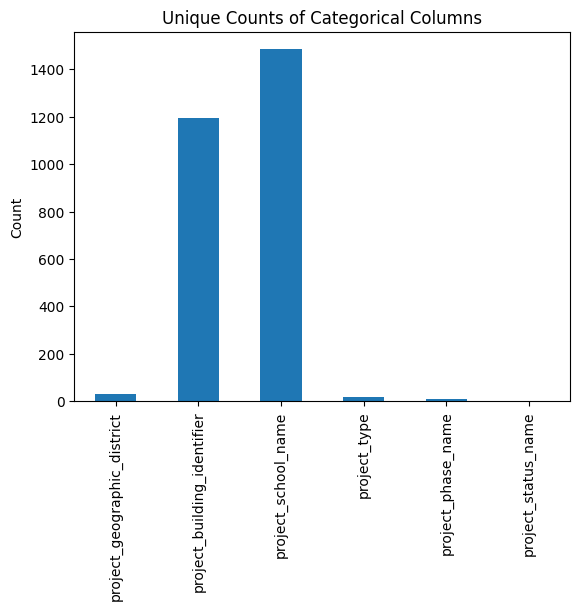

1196 distinct values in project_building_identifier
1483 distinct values in project_school_name
20 distinct values in project_type
1363 distinct values in project_description
9 distinct values in project_phase_name
3 distinct values in project_status_name
3613 distinct values in project_budget_amount
5730 distinct values in final_estimate_of_actual_costs_through_end_of_phase_amount
5060 distinct values in total_phase_actual_spending_amount
3554 distinct values in dsf_number_s


In [58]:
# Count unique values for categorical columns
categorical_summary = df_cleaned[[
    'project_geographic_district', 
    'project_building_identifier', 
    'project_school_name', 
    # 'project_description',
    'project_type', 
    'project_phase_name', 
    'project_status_name'
]].nunique()

# Visualization: Example of a bar plot for unique counts of categorical columns
categorical_summary.plot(kind='bar')
plt.title('Unique Counts of Categorical Columns')
plt.ylabel('Count')
plt.show()

categorical_features = df_cleaned.select_dtypes(include=[object]).columns

for col in categorical_features:
    unique_values = df[col].unique()
    num_values = len(unique_values)
    print(f'{num_values} distinct values in {col}')

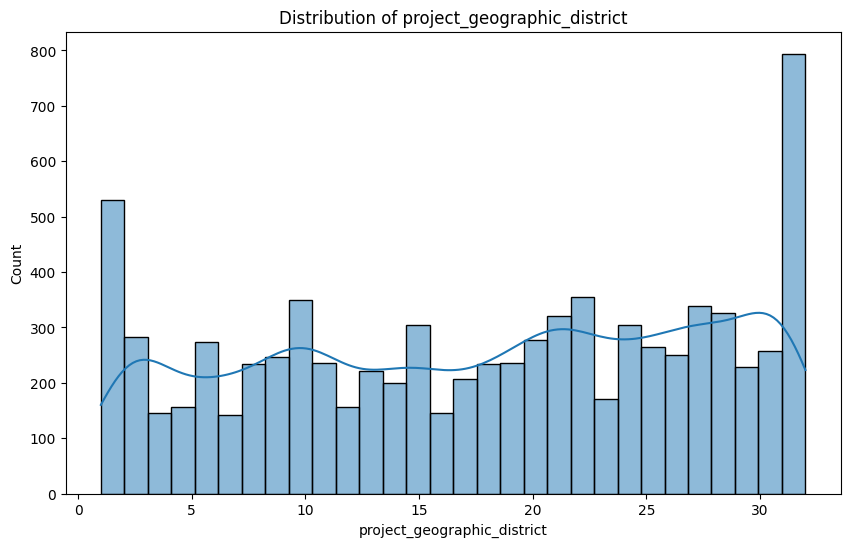

In [59]:
# Distribution of Numerical Features
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


#### Distribution of Project Budget Amounts

In [60]:
# Replace NaNs with 0s
df_cleaned['project_budget_amount'] = df_cleaned['project_budget_amount'].fillna(0)

# Define budget bins
max_value = df_cleaned['project_budget_amount'].max()
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, max_value]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M+']

# Categorize budget into bins
df_cleaned['budget_category'] = pd.cut(
    df_cleaned['project_budget_amount'], bins=bins, labels=labels, right=False
)

# Count the number of budgets in each category
budget_counts = df_cleaned['budget_category'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
budget_counts.plot(kind='bar')
plt.xlabel('Budget Ranges')
plt.ylabel('Number of Projects')
plt.title('Distribution of budget_category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Seaborn version
# plt.figure(figsize=(10, 6))
# sns.histplot(df_cleaned['budget_category'], kde=True, bins=30)
# plt.title(f'Distribution of budget_category')
# plt.show()

ValueError: bins must increase monotonically.

#### Project Count by Geographic District


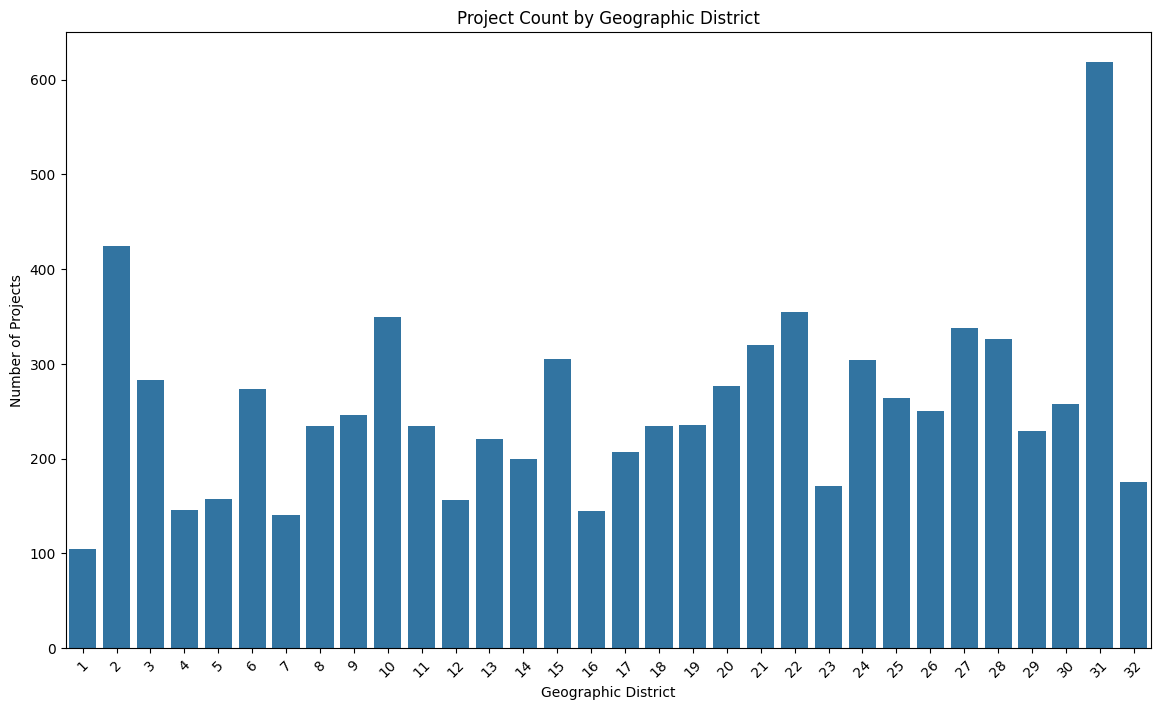

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, x='project_geographic_district')
plt.title('Project Count by Geographic District')
plt.xlabel('Geographic District')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()

#### Project Status Distribution


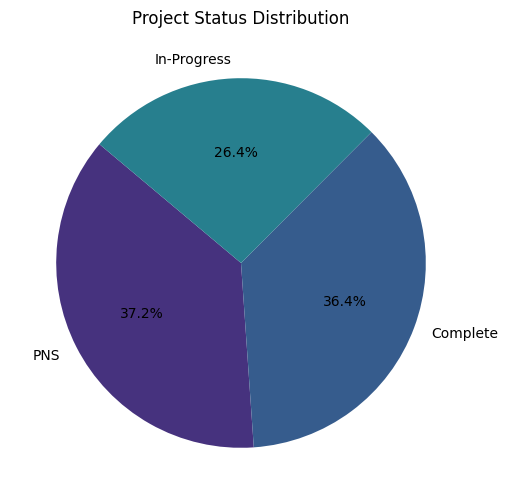

In [ ]:
plt.figure(figsize=(10, 6))
project_status_counts = df_cleaned['project_status_name'].value_counts()
plt.pie(project_status_counts, labels=project_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Project Status Distribution')
plt.show()

#### Total Spending by Project Type


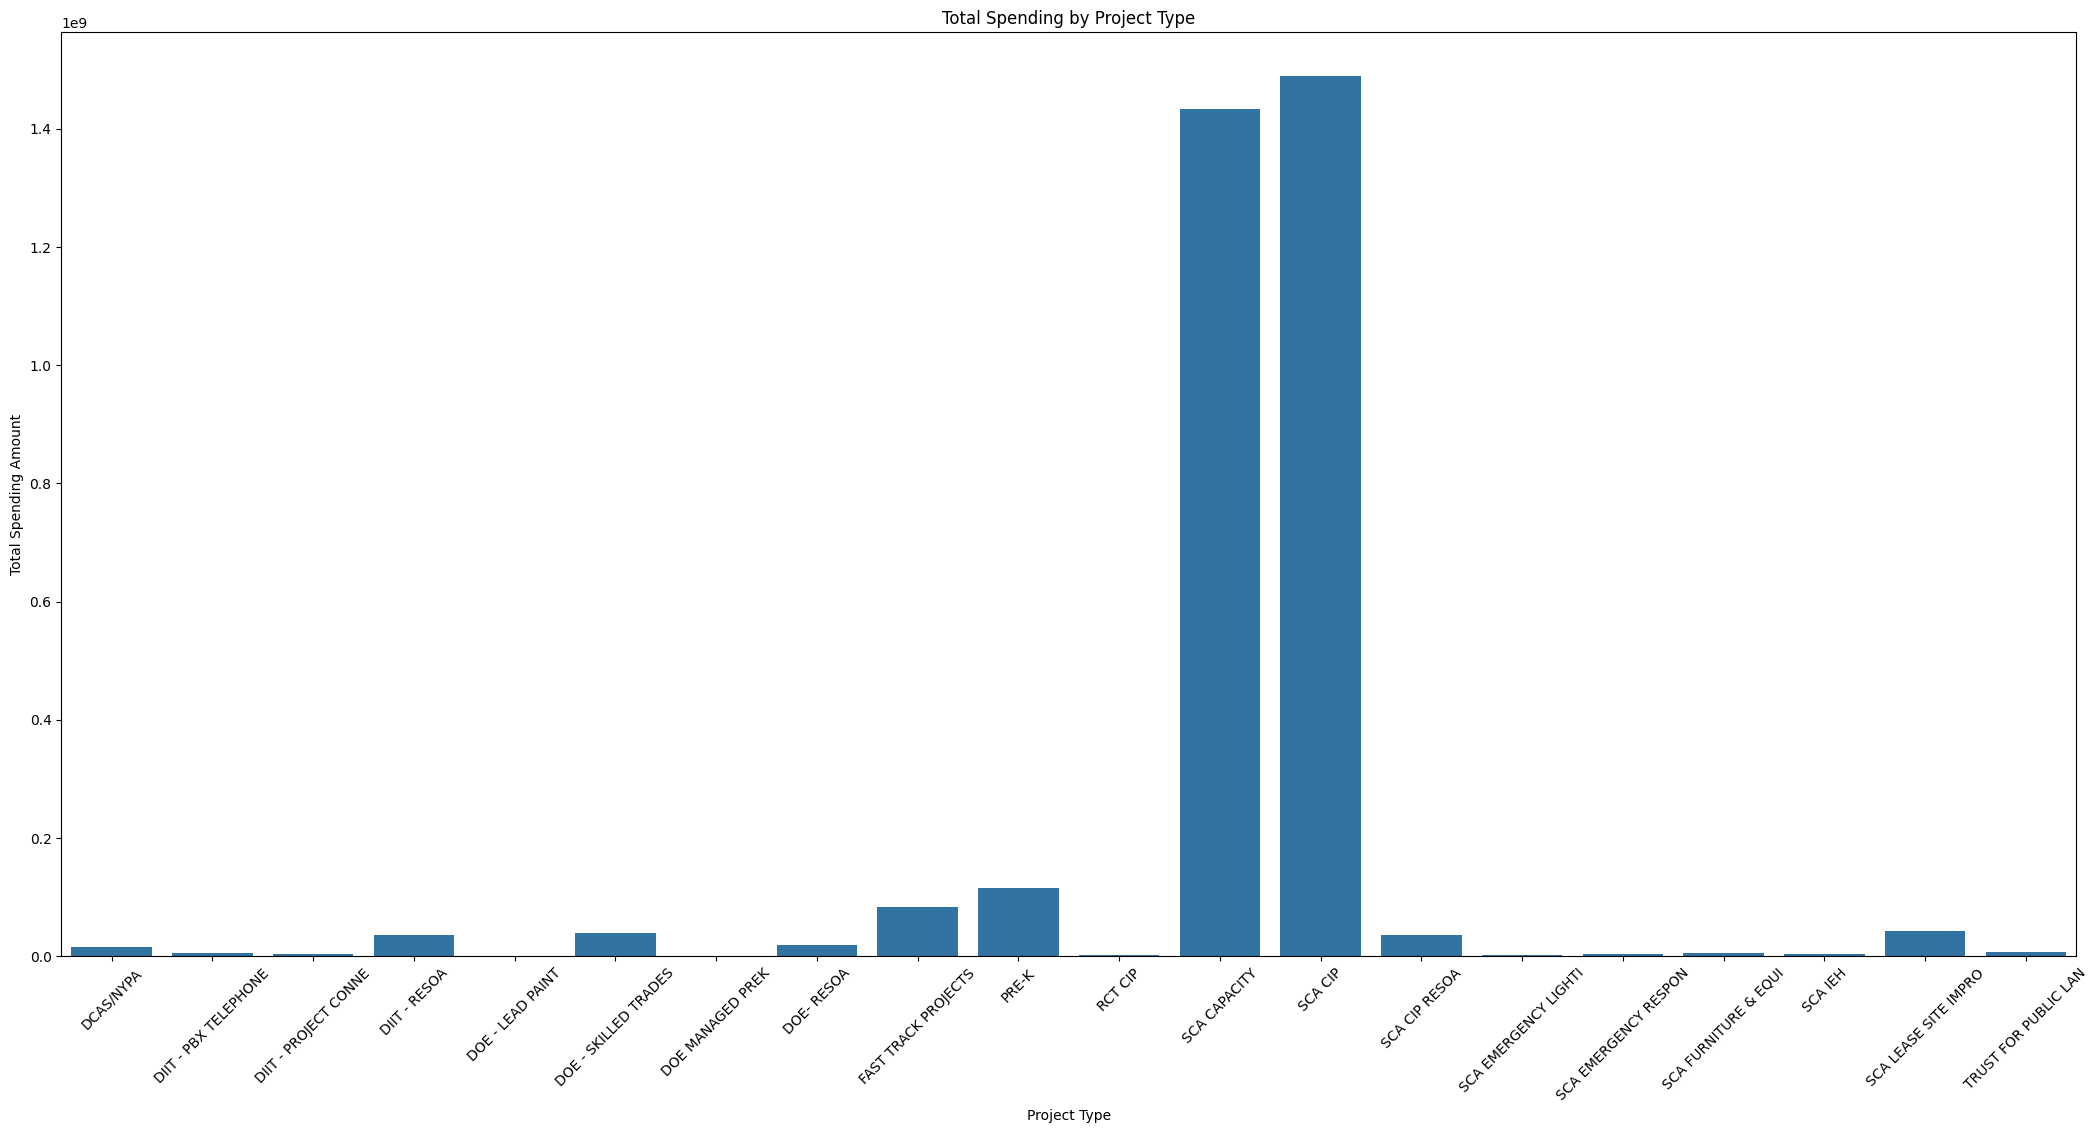

In [ ]:
plt.figure(figsize=(26, 12))
total_spending_by_type = df_cleaned.groupby('project_type')['total_phase_actual_spending_amount'].sum().reset_index()
sns.barplot(data=total_spending_by_type, x='project_type', y='total_phase_actual_spending_amount')
plt.title('Total Spending by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Total Spending Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the project_building_identifier column
# df['project_building_identifier_encoded'] = label_encoder.fit_transform(df['project_building_identifier'])
# df['project_school_name_encoded'] = label_encoder.fit_transform(df['project_school_name'])
# df['project_type_encoded'] = label_encoder.fit_transform(df['project_type'])
# df['project_description_encoded'] = label_encoder.fit_transform(df['project_description'])
# df['project_phase_name_encoded'] = label_encoder.fit_transform(df['project_phase_name'])
# df['project_status_name_encoded'] = label_encoder.fit_transform(df['project_status_name'])
# df['budget_category_encoded'] = label_encoder.fit_transform(df['budget_category'])


In [ ]:
# # Split the DSF numbers and explode into separate rows
# df['dsf_number_s'] = df['dsf_number_s'].str.replace('DSF: ', '')
# df['dsf_number_s'] = df['dsf_number_s'].str.split(', ')
# df = df.explode('dsf_number_s')

# df.reset_index(drop=True, inplace=True)
# df

In [ ]:
# correlation_matrix = df[df.select_dtypes(include=[np.number]).columns].corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# # Set the style of the visualization
# sns.set(style="whitegrid")

# # Create the boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(y=df['project_budget_amount'])

# # Add title and labels
# plt.title('Boxplot of Values')
# plt.ylabel('Values')

# # Show the plot
# plt.show()
